In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

Read Csv File

In [ ]:
df=pd.read_csv("tips-expt4 - tips-expt4.csv")

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Preprocessing

In [ ]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [ ]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
df.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

Five Number Summary For Bill and Tip

In [ ]:
bill = df.total_bill
print("Maximum Bill : ",np.max(bill))
print("Minimum Bill : ",np.min(bill))
print("Standard Deviation : ",np.std(bill))
print("Median : ",np.median(bill))
print("Mean : ",np.mean(bill))

Maximum Bill :  50.81
Minimum Bill :  3.07
Standard Deviation :  8.884150577771132
Median :  17.795
Mean :  19.78594262295082


In [ ]:
tip = df.tip
print("Maximum Bill : ",np.max(tip))
print("Minimum Bill : ",np.min(tip))
print("Standard Deviation : ",np.std(tip))
print("Median : ",np.median(tip))
print("Mean : ",np.mean(tip))

Maximum Bill :  10.0
Minimum Bill :  1.0
Standard Deviation :  1.3807999538298954
Median :  2.9
Mean :  2.99827868852459


Exploratory Data Analysis


sex
1    157
0     87
Name: count, dtype: int64


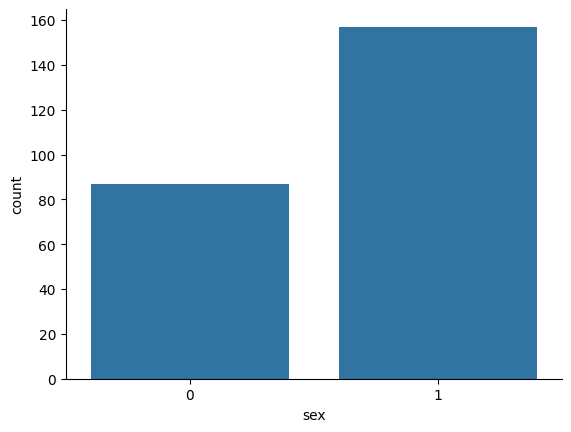

In [ ]:
sb.countplot(x='sex',data=df)
sb.despine()
print(df.sex.value_counts())

<Axes: xlabel='sex', ylabel='count'>

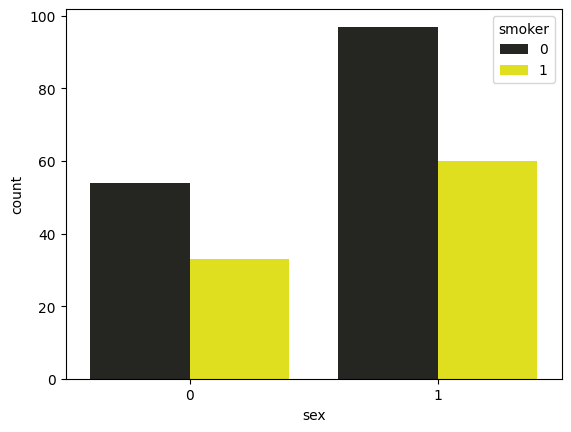

In [ ]:
sb.countplot(x='sex',data=df,hue='smoker',color='yellow')

<Axes: xlabel='day', ylabel='count'>

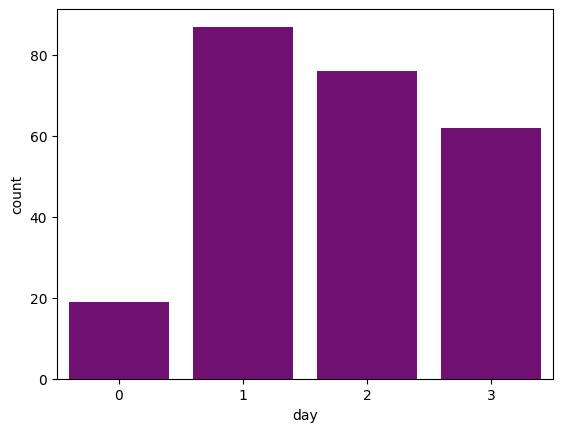

In [ ]:
# plt.figure(figsize=(8,6))
# plt.title('Tips Per Day Of Week')
sb.countplot(x=df['day'],color='purple')

<Axes: xlabel='day', ylabel='count'>

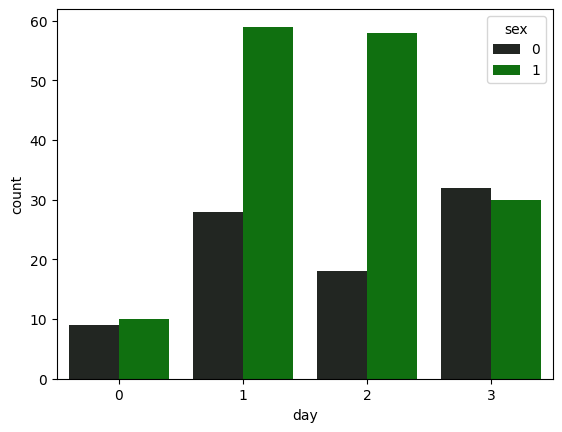

In [ ]:
sb.countplot(x='day',data=df,hue='sex',color='green')
# sb.catplot,palette='ch:.25',kind='count'

<ipython-input-13-8ce3da0f29bb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['tip'])


<Axes: xlabel='tip', ylabel='Density'>

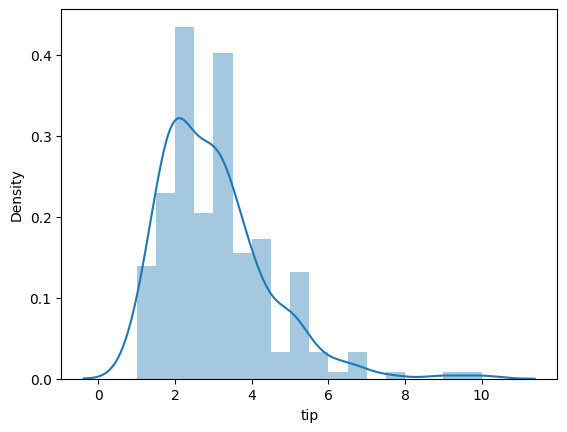

In [ ]:
sb.distplot(df['tip'])

<ipython-input-14-4137c74c6c3b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g=sb.distplot(df.tip,kde=False)


Text(0.5, 1.0, 'Tip Amount Histogram')

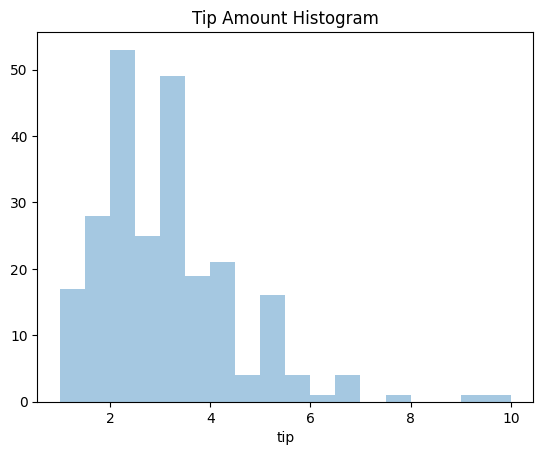

In [ ]:
g=sb.distplot(df.tip,kde=False)
g.set_title('Tip Amount Histogram')

Outliers In bill column

<Axes: xlabel='total_bill'>

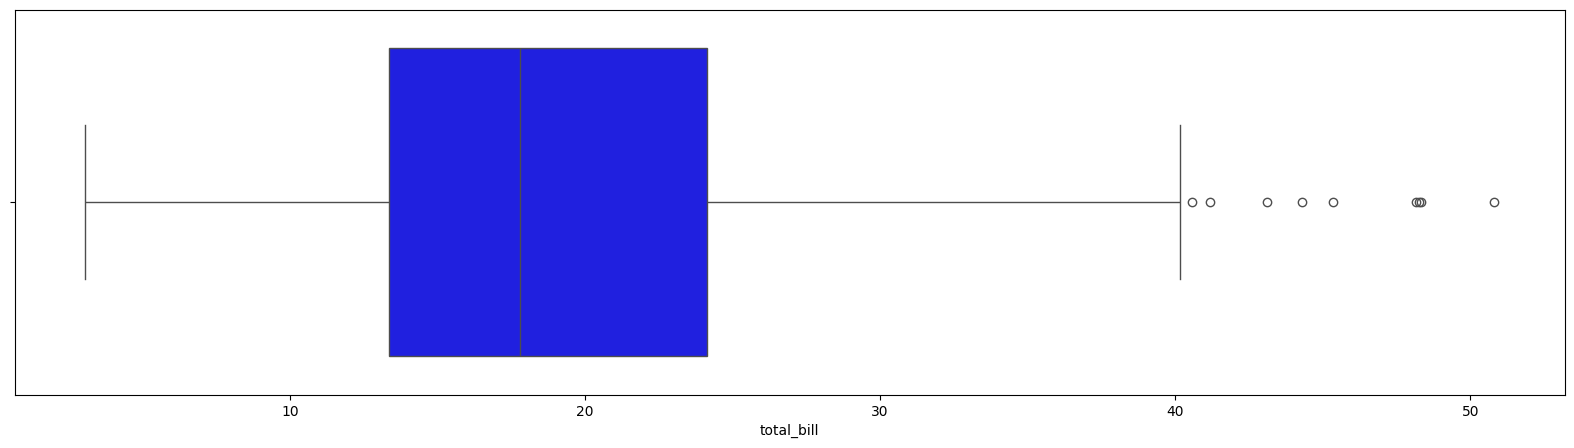

In [ ]:
plt.figure(figsize=(20,5))
sb.boxplot(x=bill,color='b')

Outliers In tip column

<Axes: xlabel='tip'>

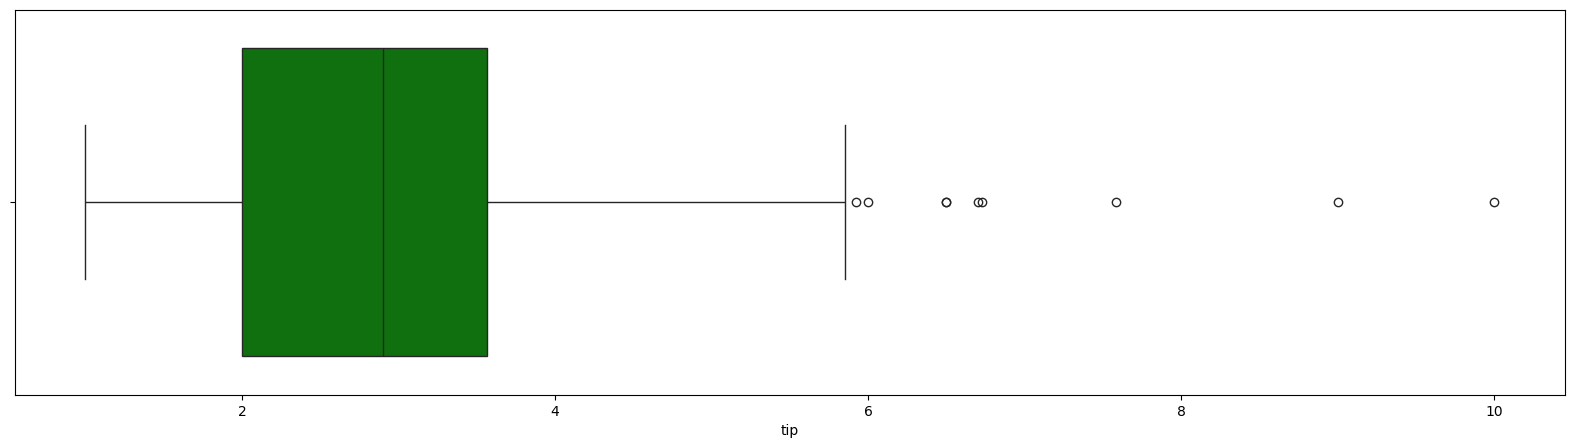

In [ ]:
plt.figure(figsize=(20,5))
sb.boxplot(x=tip,color='g')

IQR Value

In [ ]:
# bill_tip=pd.DataFrame(df,columns=['total_bill','tips','size'])

# print(bill_tip)

print("IQR For Total Bill : ",stats.iqr(bill))
print("IQR For Tip : ",stats.iqr(tip))

IQR For Total Bill :  10.779999999999998
IQR For Tip :  1.5625


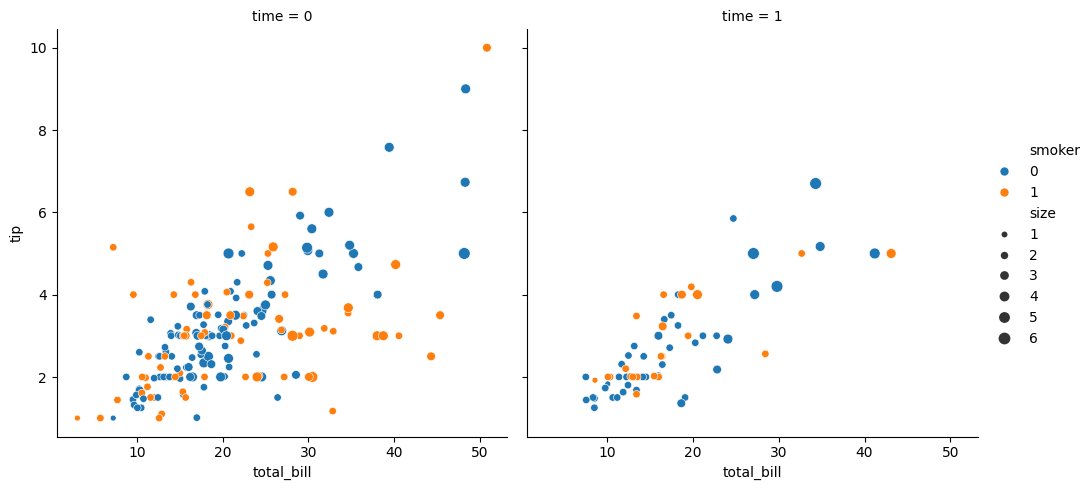

In [ ]:
sb.relplot(x='total_bill',y='tip',data=df,col='time',hue='smoker',size='size')


<Figure size 1200x1000 with 0 Axes>

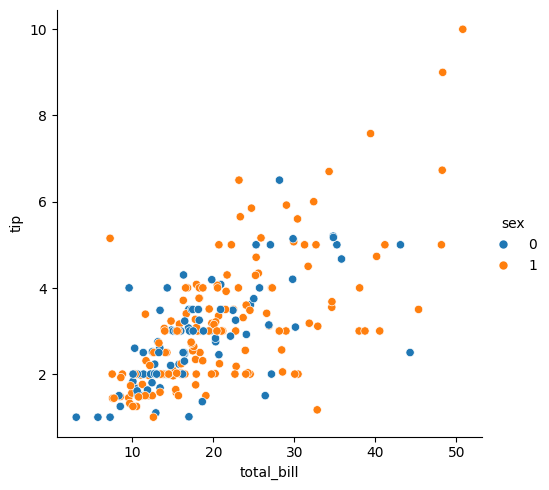

In [ ]:
plt.figure(figsize=(12,10))
sb.relplot(data=df,x='total_bill',y="tip",hue="sex")

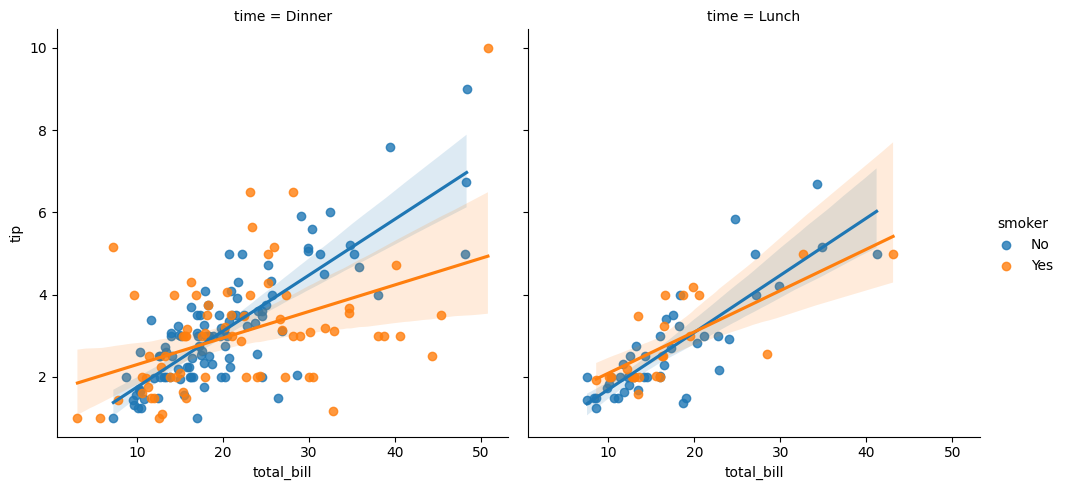

In [ ]:
sb.lmplot(x='total_bill',y='tip',data=df,col='time',hue='smoker')

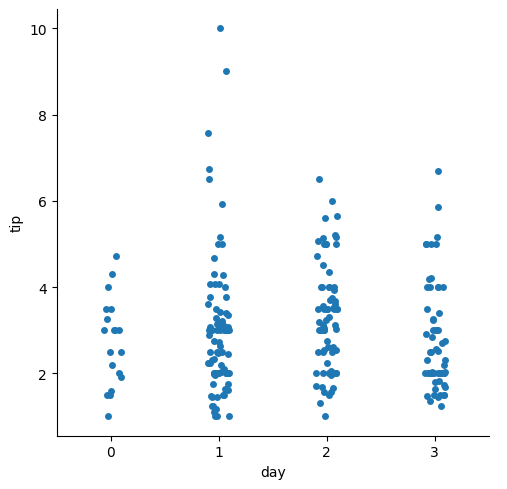

In [ ]:
sb.catplot(x='day',y='tip',data=df)

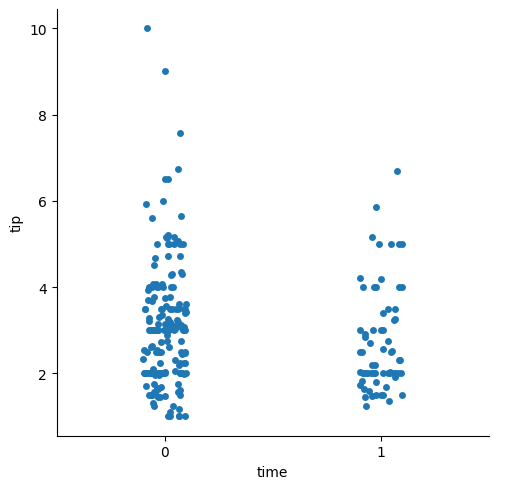

In [ ]:
sb.catplot(x='time',y='tip',data=df)

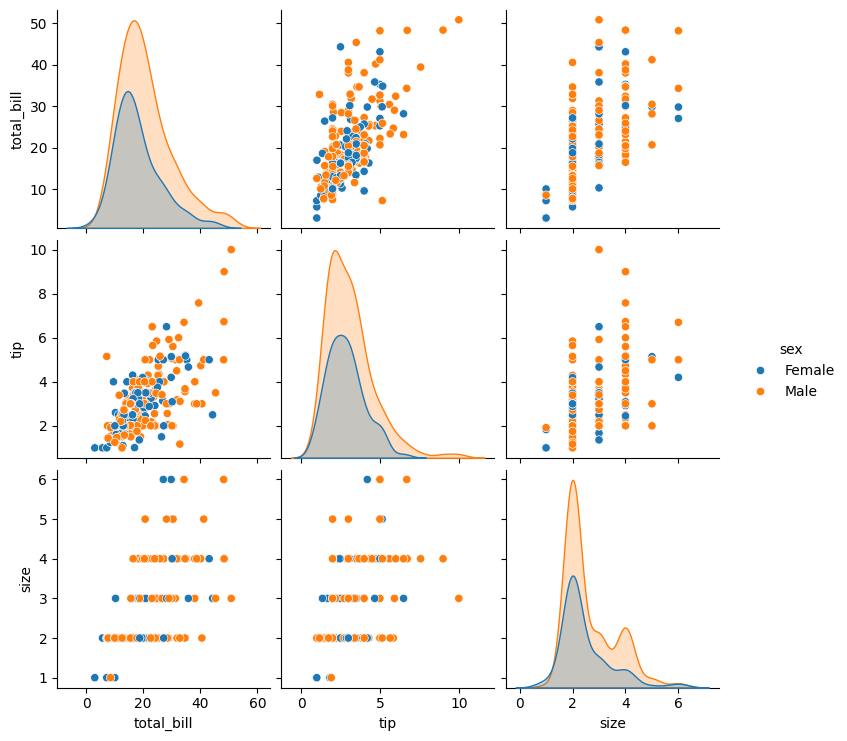

In [ ]:
sb.pairplot(df,hue='sex')

Correlation Matrix

(7.5, -0.5)

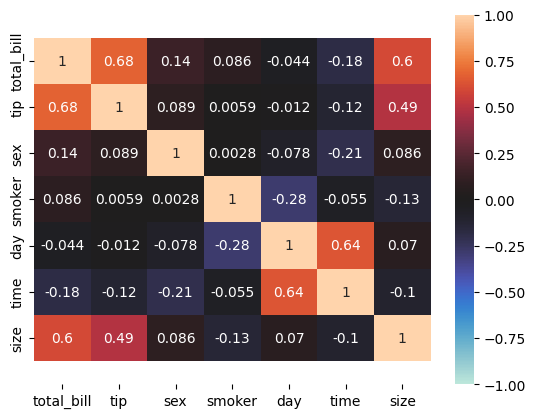

In [ ]:
corr_matrix=df.corr()
ax=sb.heatmap(data=corr_matrix,annot=True,vmax=1,vmin=-1,center=0)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_df = LabelEncoder()
df['sex']=labelencoder_df.fit_transform(df['sex'])
df['smoker']=labelencoder_df.fit_transform(df['smoker'])
df['day']=labelencoder_df.fit_transform(df['day'])
df['time']=labelencoder_df.fit_transform(df['time'])
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


(7.5, -0.5)

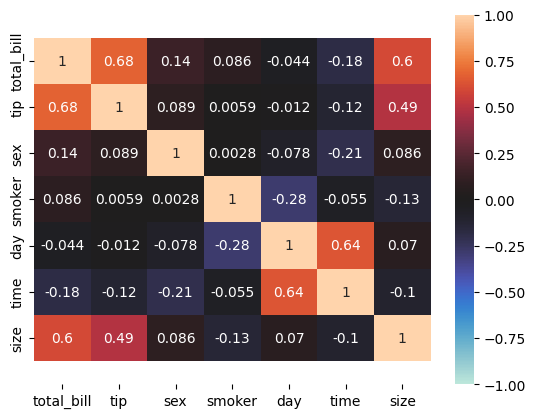

In [ ]:
corr_matrix=df.corr()
ax=sb.heatmap(data=corr_matrix,annot=True,vmax=1,vmin=-1,center=0)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)